In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter, CoxPHFitter

Read the data

In [2]:
DatOriginal = pd.read_csv("DatasetsMedicalResearch/Treatment of hypernephroma.dat", sep="\s+")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4079/2990632959.py:1: SyntaxWarning: invalid escape sequence '\s'
  DatOriginal = pd.read_csv("DatasetsMedicalResearch/Treatment of hypernephroma.dat", sep="\s+")


In [3]:
DatOriginal.head()

,nephrectomy,age,time,status
0,0,1,9,1
1,0,1,6,1
2,0,1,21,1
3,0,2,15,1
4,0,2,8,1


In [4]:
cph = CoxPHFitter()
Model = cph.fit(DatOriginal, 'time', 'status', formula='C(age)+C(nephrectomy)')

In [5]:
Model.print_summary()

<lifelines.CoxPHFitter: fitted with 36 total observations, 4 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 36
number of events observed = 32
   partial log-likelihood = -82.11
         time fit was run = 2024-09-11 07:46:10 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
C(age)[T.2]          0.02      1.02      0.43           -0.81            0.85                0.44                2.35
C(age)[T.3]          1.36      3.90      0.60            0.19            2.53                1.21               12.56
C(nephrectomy)[T.1] -1.40      0.25      0.52           -2.41           -0.39                0.09                0.68

                     cmp to     z    p  -log2(p)
covariate                                       
C(age)[T.2]            0.00  0.05 0.96      0.06
C(age)[T.3]            0.00  2.28 0.02      5.46
C(nephrectomy)[T.1]    0.00 -2.72 0.01      7.26
---
Concordance = 0.67
Partial AIC = 170.22
log-likelihood ratio test = 12.36 on 3 df
-log2(p) of ll-ratio test = 7.32

<Axes: >

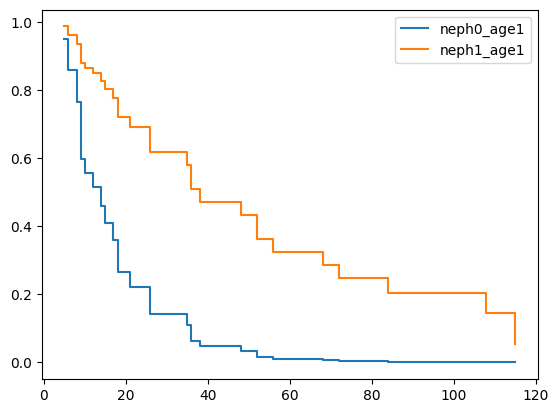

In [6]:
#ax = Model.baseline_survival_.plot(drawstyle="steps-post")
Model.predict_survival_function(
    pd.DataFrame({'nephrectomy':[0,1], 'age':[1,1]}, index=['neph0_age1', 'neph1_age1'])
).plot(drawstyle="steps-post")

<Axes: >

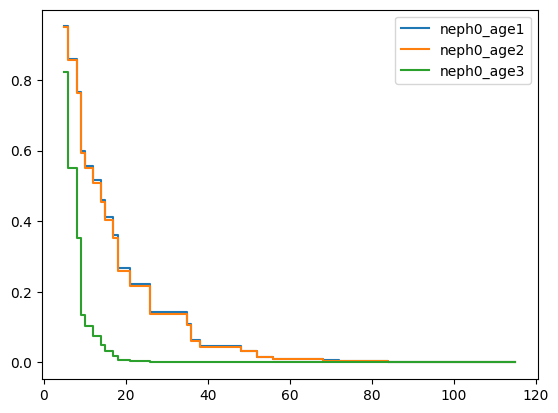

In [7]:
#ax = Model.baseline_survival_.plot(drawstyle="steps-post")
Model.predict_survival_function(
    pd.DataFrame({'nephrectomy':[0,0,0], 'age':[1,2,3]}, index=['neph0_age1', 'neph0_age2', 'neph0_age3'])
).plot(drawstyle="steps-post")

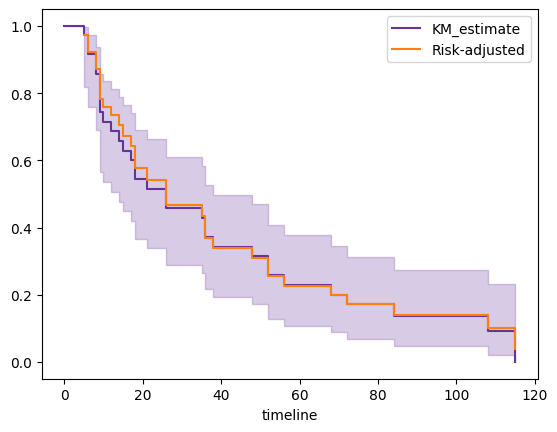

In [8]:
kmf = KaplanMeierFitter()
kmf.fit(DatOriginal['time'], event_observed=DatOriginal['status'])

ax = kmf.plot_survival_function(color='rebeccapurple')
Model.predict_survival_function(DatOriginal).mean(axis=1).plot(drawstyle="steps-post", label='Risk-adjusted')
plt.legend()